<a href="https://colab.research.google.com/github/isiaqraheem/Water_quality/blob/main/NEURAL_NETWORK__water_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/gdrive


In [ ]:
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

In [ ]:
df=pd.read_csv('gdrive/My Drive/phytoplankton.csv')
df



,Phytoplankton Monitoring Programme results,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Sample number,Production area,Bed ID,Local authority,Grid reference\n\nNote 1,Sampling point,Date sample collected,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),Ligulodinium polyedrum \ncells L-1\n(Yessotoxin),Protoceratium reticulatum \ncells L-1\n(Yessotoxin),Prorocentrum cordatum \ncells L-1\n(Venerupin),NaN,NaN
1,1/21,Solent,B24BK,Southampton PHA,SZ57479794,Browndown,1/4/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
2,2/21,Southampton Water,B21AT,Southampton PHA,SU48760530,Hamble Estuary,1/4/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
3,3/21,Brancaster,B05AS,Kings Lynn & W Norfolk BC,TF79884539,Norton Creek Mussels,1/5/2021,ND,ND,ND,400,ND,ND,ND,NaN,NaN
4,4/21,Porlock,B094D,Somerset West and Taunton Council,SS87114787,Porlock East,1/5/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
5,5/21,Blackwater,B14AD,Maldon DC,TM04060768,St Peters Flats,1/6/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
6,6/21,North Kent Coast,B17BS,Canterbury CC,TR10326689,WOCO Westbeach,1/11/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
7,7/21,West Mersea,B013Z,Colchester BC,TM00001301,The Hard,1/11/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
8,9/21,Fowey,B70AB,Cornwall PHA,SX13025157,Pont Pill,1/11/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
9,10/21,Lantivet Bay,B70AH,Cornwall PHA,SX16305094,Sandheap Point,1/11/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN


In [ ]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df = df[:828]

In [ ]:
df.head(10)

,Sample number,Production area,Bed ID,Local authority,Grid reference\n\nNote 1,Sampling point,Date sample collected,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),Ligulodinium polyedrum \ncells L-1\n(Yessotoxin),Protoceratium reticulatum \ncells L-1\n(Yessotoxin),Prorocentrum cordatum \ncells L-1\n(Venerupin),NaN,NaN
1,1/21,Solent,B24BK,Southampton PHA,SZ57479794,Browndown,1/4/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
2,2/21,Southampton Water,B21AT,Southampton PHA,SU48760530,Hamble Estuary,1/4/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
3,3/21,Brancaster,B05AS,Kings Lynn & W Norfolk BC,TF79884539,Norton Creek Mussels,1/5/2021,ND,ND,ND,400,ND,ND,ND,NaN,NaN
4,4/21,Porlock,B094D,Somerset West and Taunton Council,SS87114787,Porlock East,1/5/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
5,5/21,Blackwater,B14AD,Maldon DC,TM04060768,St Peters Flats,1/6/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
6,6/21,North Kent Coast,B17BS,Canterbury CC,TR10326689,WOCO Westbeach,1/11/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
7,7/21,West Mersea,B013Z,Colchester BC,TM00001301,The Hard,1/11/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
8,9/21,Fowey,B70AB,Cornwall PHA,SX13025157,Pont Pill,1/11/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
9,10/21,Lantivet Bay,B70AH,Cornwall PHA,SX16305094,Sandheap Point,1/11/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
10,11/21,Mevagissey Bay,B70AK,Cornwall PHA,SX05214698,South Mevagissey Bottom,1/11/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN


In [ ]:
df.columns

Index([                                       'Sample number',
                                            'Production area',
                                                     'Bed ID',
                                            'Local authority',
                      'Grid reference\n\nNote 1             ',
                                             'Sampling point',
                                      'Date sample collected',
                        'Alexandrium spp. \ncells L-1\n(PSP)',
                          'Dinophysiaceae \ncells L-1\n(DSP)',
                       'Prorocentrum lima \ncells L-1\n(DSP)',
                  'Pseudo-nitzschia spp. \ncells L-1\n(ASP) ',
           'Ligulodinium polyedrum \ncells L-1\n(Yessotoxin)',
       'Protoceratium reticulatum \ncells L-1\n(Yessotoxin) ',
            'Prorocentrum cordatum \ncells L-1\n(Venerupin) ',
                                                          nan,
                                                       

In [ ]:
df.shape

(828, 16)

In [ ]:
df.isnull().sum()

0
Sample number                                             0
Production area                                           1
Bed ID                                                    1
Local authority                                           0
Grid reference\n\nNote 1                                  1
Sampling point                                            0
Date sample collected                                     0
Alexandrium spp. \ncells L-1\n(PSP)                       0
Dinophysiaceae \ncells L-1\n(DSP)                         1
Prorocentrum lima \ncells L-1\n(DSP)                      1
Pseudo-nitzschia spp. \ncells L-1\n(ASP)                  1
Ligulodinium polyedrum \ncells L-1\n(Yessotoxin)          1
Protoceratium reticulatum \ncells L-1\n(Yessotoxin)       0
Prorocentrum cordatum \ncells L-1\n(Venerupin)            0
NaN                                                     828
NaN                                                     828
dtype: int64

In [ ]:
def clean_data(df):
 df['Alexandrium spp. \ncells L-1\n(PSP)'] = df['Alexandrium spp. \ncells L-1\n(PSP)'].replace("ND", 0)
 df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "].replace("ND", 0)
 df["Dinophysiaceae \ncells L-1\n(DSP)"] = df["Dinophysiaceae \ncells L-1\n(DSP)"].replace("ND", 0)
 df["Prorocentrum lima \ncells L-1\n(DSP)"] = df["Prorocentrum lima \ncells L-1\n(DSP)"].replace("ND", 0)

 df['Alexandrium spp. \ncells L-1\n(PSP)'] = pd.to_numeric(df['Alexandrium spp. \ncells L-1\n(PSP)'], errors='coerce')
 df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = pd.to_numeric(df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "], errors='coerce')
 df["Dinophysiaceae \ncells L-1\n(DSP)"] = pd.to_numeric(df["Dinophysiaceae \ncells L-1\n(DSP)"], errors='coerce')
 df["Prorocentrum lima \ncells L-1\n(DSP)"] = pd.to_numeric(df["Prorocentrum lima \ncells L-1\n(DSP)"], errors='coerce') 

 df['Alexandrium spp. \ncells L-1\n(PSP)'] = df['Alexandrium spp. \ncells L-1\n(PSP)'].fillna(-1)
 df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "].fillna(-1)
 df["Dinophysiaceae \ncells L-1\n(DSP)"] = df["Dinophysiaceae \ncells L-1\n(DSP)"].fillna(-1)
 df["Prorocentrum lima \ncells L-1\n(DSP)"] = df["Prorocentrum lima \ncells L-1\n(DSP)"].fillna(-1)
 
 return df


In [ ]:
df = clean_data(df)

In [ ]:
df.isna().sum()

0
Sample number                                             0
Production area                                           1
Bed ID                                                    1
Local authority                                           0
Grid reference\n\nNote 1                                  1
Sampling point                                            0
Date sample collected                                     0
Alexandrium spp. \ncells L-1\n(PSP)                       0
Dinophysiaceae \ncells L-1\n(DSP)                         0
Prorocentrum lima \ncells L-1\n(DSP)                      0
Pseudo-nitzschia spp. \ncells L-1\n(ASP)                  0
Ligulodinium polyedrum \ncells L-1\n(Yessotoxin)          1
Protoceratium reticulatum \ncells L-1\n(Yessotoxin)       0
Prorocentrum cordatum \ncells L-1\n(Venerupin)            0
NaN                                                     828
NaN                                                     828
dtype: int64

In [ ]:
thresholds = {'Alexandrium spp. \ncells L-1\n(PSP)' : 40, 'Dinophysiaceae \ncells L-1\n(DSP)': 100, "Prorocentrum lima \ncells L-1\n(DSP)" : 100, "Pseudo-nitzschia spp. \ncells L-1\n(ASP) " : 150000}

In [ ]:
def check_thresholds(df):
    t = []
    for i,j in enumerate(df["Sample number"]):

        alexandrium = df.iloc[i]['Alexandrium spp. \ncells L-1\n(PSP)']
        pseudo_nitzschia = df.iloc[i]["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "]
        dinophysiaceae = df.iloc[i]['Dinophysiaceae \ncells L-1\n(DSP)']
        prorocentrum = df.iloc[i]["Prorocentrum lima \ncells L-1\n(DSP)"]

        threshold_reached = 0
        if pseudo_nitzschia >= thresholds["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "]:
            threshold_reached = 1
        elif dinophysiaceae >= thresholds['Dinophysiaceae \ncells L-1\n(DSP)']:

            threshold_reached = 1
        elif prorocentrum >= thresholds["Prorocentrum lima \ncells L-1\n(DSP)"]:
            threshold_reached = 1
        elif alexandrium >= thresholds['Alexandrium spp. \ncells L-1\n(PSP)']:
            threshold_reached = 1

        t.append(threshold_reached)

    return t

In [ ]:
thresholds_reached = check_thresholds(df)
df['thresholds_reached'] = thresholds_reached


In [ ]:
pd.DataFrame.to_csv(df, 'gdrive/My Drive/thresholds_clean.csv', sep=',', index=False)

In [ ]:
x = pd.read_csv('gdrive/My Drive/thresholds_clean.csv', usecols=["Pseudo-nitzschia spp. \ncells L-1\n(ASP) ", "Dinophysiaceae \ncells L-1\n(DSP)", "Prorocentrum lima \ncells L-1\n(DSP)", "Alexandrium spp. \ncells L-1\n(PSP)"], na_values = ['no info', '.'])
y = pd.read_csv('gdrive/My Drive/thresholds_clean.csv', usecols=["thresholds_reached"])

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import *
from keras.utils import np_utils

**ARCHITECTURE 1**

In [ ]:
model = Sequential()
model.add(Dense(units=1000, activation='relu', input_shape=(4,)))
model.add(Dropout(0.2))
model.add(Dense(units=5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              5000      
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 5005      
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 10,011
Trainable params: 10,011
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
 optimizer='RMSprop',
 metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
epochs = 10
history = model.fit(x_train, y_train,batch_size=16,epochs = 10,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
11/11 [==============================] - 1s 31ms/step - loss: 8.8571 - accuracy: 0.8788 - val_loss: 1.1937 - val_accuracy: 0.8989
Epoch 2/10
11/11 [==============================] - 0s 9ms/step - loss: 0.9038 - accuracy: 0.9333 - val_loss: 0.7143 - val_accuracy: 0.8914
Epoch 3/10
11/11 [==============================] - 0s 9ms/step - loss: 0.5724 - accuracy: 0.9273 - val_loss: 0.5822 - val_accuracy: 0.8974
Epoch 4/10
11/11 [==============================] - 0s 9ms/step - loss: 0.5601 - accuracy: 0.9152 - val_loss: 0.5552 - val_accuracy: 0.8974
Epoch 5/10
11/11 [==============================] - 0s 10ms/step - loss: 1.5983 - accuracy: 0.9273 - val_loss: 0.5284 - val_accuracy: 0.8974
Epoch 6/10
11/11 [==============================] - 0s 10ms/step - loss: 0.4917 - accuracy: 0.9333 - val_loss: 0.5013 - val_accuracy: 0.8974
Epoch 7/10
11/11 [==============================] - 0s 11ms/step - loss: 0.4741 - accuracy: 0.9333 - val_loss: 0.4751 - val_accuracy: 0.8974
Epoch 8/10
11/11

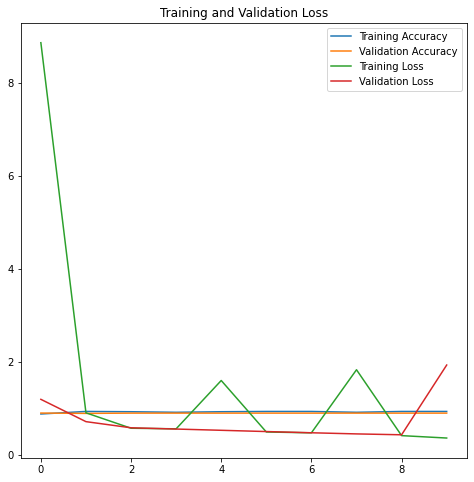

In [ ]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs_range = range(epochs) 
plt.figure(figsize=(8, 8)) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy') 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 
plt.title('Training and Validation Loss') 
plt.savefig("water_quality_nn.pdf", dpi=100) 
plt.show() 

**ARCHITECTURE 2**

In [ ]:
model = Sequential()
model.add(Dense(units=1000, activation='sigmoid', input_shape=(4,)))
model.add(Dropout(0.2))
model.add(Dense(units=500, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(units=5, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
 optimizer='adam',
 metrics=['accuracy'])

In [ ]:
epochs = 10
history = model.fit(x_train, y_train,batch_size=16,epochs = 10,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
45/45 [==============================] - 1s 16ms/step - loss: 0.3521 - accuracy: 0.8954 - val_loss: 0.3540 - val_accuracy: 0.8722
Epoch 2/10
45/45 [==============================] - 1s 11ms/step - loss: 0.3119 - accuracy: 0.8982 - val_loss: 0.3322 - val_accuracy: 0.8722
Epoch 3/10
45/45 [==============================] - 0s 11ms/step - loss: 0.2940 - accuracy: 0.8982 - val_loss: 0.3156 - val_accuracy: 0.8722
Epoch 4/10
45/45 [==============================] - 0s 11ms/step - loss: 0.2786 - accuracy: 0.9079 - val_loss: 0.2782 - val_accuracy: 0.9056
Epoch 5/10
45/45 [==============================] - 0s 10ms/step - loss: 0.2472 - accuracy: 0.9512 - val_loss: 0.2433 - val_accuracy: 0.9222
Epoch 6/10
45/45 [==============================] - 0s 10ms/step - loss: 0.2418 - accuracy: 0.9484 - val_loss: 0.2333 - val_accuracy: 0.9556
Epoch 7/10
45/45 [==============================] - 0s 11ms/step - loss: 0.2228 - accuracy: 0.9540 - val_loss: 0.2164 - val_accuracy: 0.9444
Epoch 8/10
45

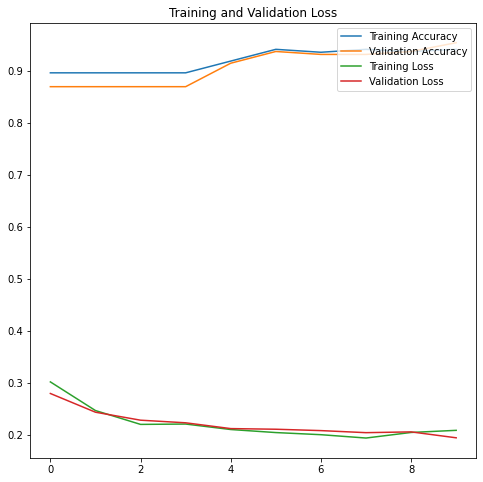

In [ ]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs_range = range(epochs) 
plt.figure(figsize=(8, 8)) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy') 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 
plt.title('Training and Validation Loss') 
plt.savefig("water_quality_nn.pdf", dpi=100) 
plt.show() 

**ARCHITECTURE 3**

In [ ]:
model = Sequential()
model.add(Dense(units=1000, activation='tanh', input_shape=(4,)))
model.add(Dropout(0.2))
model.add(Dense(units=500, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=100, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=5, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 1000)              5000      
                                                                 
 dropout_36 (Dropout)        (None, 1000)              0         
                                                                 
 dense_59 (Dense)            (None, 500)               500500    
                                                                 
 dropout_37 (Dropout)        (None, 500)               0         
                                                                 
 dense_60 (Dense)            (None, 100)               50100     
                                                                 
 dropout_38 (Dropout)        (None, 100)               0         
                                                                 
 dense_61 (Dense)            (None, 5)               

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [ ]:
epochs = 10
history = model.fit(x_train, y_train,batch_size=16,epochs = 10,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
45/45 [==============================] - 1s 15ms/step - loss: 0.4307 - accuracy: 0.9163 - val_loss: 0.4046 - val_accuracy: 0.8833
Epoch 2/10
45/45 [==============================] - 1s 12ms/step - loss: 0.3465 - accuracy: 0.9289 - val_loss: 0.3634 - val_accuracy: 0.8889
Epoch 3/10
45/45 [==============================] - 0s 10ms/step - loss: 0.3123 - accuracy: 0.9317 - val_loss: 0.3498 - val_accuracy: 0.8889
Epoch 4/10
45/45 [==============================] - 1s 11ms/step - loss: 0.2850 - accuracy: 0.9317 - val_loss: 0.3194 - val_accuracy: 0.8889
Epoch 5/10
45/45 [==============================] - 1s 11ms/step - loss: 0.2683 - accuracy: 0.9317 - val_loss: 0.3027 - val_accuracy: 0.8889
Epoch 6/10
45/45 [==============================] - 0s 11ms/step - loss: 0.2428 - accuracy: 0.9358 - val_loss: 0.3039 - val_accuracy: 0.8889
Epoch 7/10
45/45 [==============================] - 0s 11ms/step - loss: 0.2430 - accuracy: 0.9344 - val_loss: 0.2893 - val_accuracy: 0.9111
Epoch 8/10
45

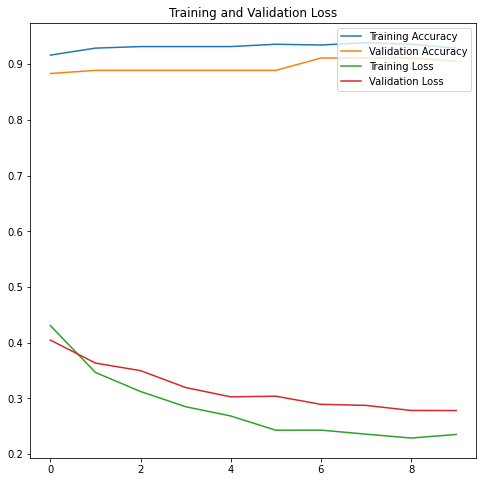

In [ ]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs_range = range(epochs) 
plt.figure(figsize=(8, 8)) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy') 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 
plt.title('Training and Validation Loss') 
plt.savefig("water_quality_nn.pdf", dpi=100) 
plt.show() 

# Finding the effect of Layers on Accuracy

:**EFFECT OF INCREASING LAYERS ON ACHITECTURE ONE**:

4 LAYERS

In [ ]:
model = Sequential()
model.add(Dense(units=1000, activation='relu', input_shape=(4,)))
model.add(Dropout(0.2))
model.add(Dense(units=500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=500, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
 optimizer='RMSprop',
 metrics=['accuracy'])

In [ ]:
epochs = 10
history = model.fit(x_train, y_train,batch_size=16,epochs = 10,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
42/42 [==============================] - 2s 18ms/step - loss: 452.4101 - accuracy: 0.7659 - val_loss: 45.5306 - val_accuracy: 0.9157
Epoch 2/10
42/42 [==============================] - 1s 13ms/step - loss: 169.9703 - accuracy: 0.7825 - val_loss: 295.3554 - val_accuracy: 0.5181
Epoch 3/10
42/42 [==============================] - 1s 13ms/step - loss: 168.7565 - accuracy: 0.7613 - val_loss: 363.8464 - val_accuracy: 0.9277
Epoch 4/10
42/42 [==============================] - 1s 14ms/step - loss: 212.5489 - accuracy: 0.7644 - val_loss: 119.2593 - val_accuracy: 0.5000
Epoch 5/10
42/42 [==============================] - 1s 13ms/step - loss: 239.7307 - accuracy: 0.7734 - val_loss: 561.6139 - val_accuracy: 0.5181
Epoch 6/10
42/42 [==============================] - 1s 14ms/step - loss: 214.4392 - accuracy: 0.7387 - val_loss: 289.5667 - val_accuracy: 0.5181
Epoch 7/10
42/42 [==============================] - 1s 14ms/step - loss: 224.8516 - accuracy: 0.7085 - val_loss: 144.3809 - val_acc

**Adding 5th layers to Architecture 1**


In [ ]:

model = Sequential()
model.add(Dense(units=1000, activation='relu', input_shape=(4,)))
model.add(Dropout(0.2))
model.add(Dense(units=500, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
 optimizer='RMSprop',
 metrics=['accuracy'])

In [ ]:
epochs = 10
history = model.fit(x_train, y_train,batch_size=16,epochs = 10,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
42/42 [==============================] - 1s 16ms/step - loss: 226.4040 - accuracy: 0.7508 - val_loss: 89.8475 - val_accuracy: 0.9398
Epoch 2/10
42/42 [==============================] - 0s 12ms/step - loss: 84.4854 - accuracy: 0.7538 - val_loss: 11.9404 - val_accuracy: 0.5361
Epoch 3/10
42/42 [==============================] - 0s 10ms/step - loss: 91.8011 - accuracy: 0.8006 - val_loss: 18.9807 - val_accuracy: 0.9217
Epoch 4/10
42/42 [==============================] - 0s 10ms/step - loss: 129.4001 - accuracy: 0.7961 - val_loss: 58.7398 - val_accuracy: 0.5181
Epoch 5/10
42/42 [==============================] - 0s 10ms/step - loss: 80.2530 - accuracy: 0.8142 - val_loss: 102.3716 - val_accuracy: 0.5181
Epoch 6/10
42/42 [==============================] - 0s 10ms/step - loss: 97.7723 - accuracy: 0.7175 - val_loss: 63.8165 - val_accuracy: 0.5181
Epoch 7/10
42/42 [==============================] - 0s 10ms/step - loss: 40.1121 - accuracy: 0.7810 - val_loss: 8.8606 - val_accuracy: 0.92

**Adding 6th layers to Architecture 1**

In [ ]:
model = Sequential()
model.add(Dense(units=1000, activation='relu', input_shape=(4,)))
model.add(Dropout(0.2))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
 optimizer='RMSprop',
 metrics=['accuracy'])

In [ ]:
epochs = 10
history = model.fit(x_train, y_train,batch_size=16,epochs = 10,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
42/42 [==============================] - 3s 30ms/step - loss: 99.3969 - accuracy: 0.7432 - val_loss: 113.4022 - val_accuracy: 0.9217
Epoch 2/10
42/42 [==============================] - 1s 13ms/step - loss: 79.0372 - accuracy: 0.7931 - val_loss: 31.8234 - val_accuracy: 0.9337
Epoch 3/10
42/42 [==============================] - 1s 14ms/step - loss: 83.4542 - accuracy: 0.7538 - val_loss: 27.5304 - val_accuracy: 0.5241
Epoch 4/10
42/42 [==============================] - 1s 12ms/step - loss: 49.8876 - accuracy: 0.7734 - val_loss: 28.5872 - val_accuracy: 0.5241
Epoch 5/10
42/42 [==============================] - 1s 13ms/step - loss: 101.6163 - accuracy: 0.7356 - val_loss: 7.4981 - val_accuracy: 0.5361
Epoch 6/10
42/42 [==============================] - 1s 12ms/step - loss: 45.8025 - accuracy: 0.7417 - val_loss: 19.0579 - val_accuracy: 0.5181
Epoch 7/10
42/42 [==============================] - 1s 14ms/step - loss: 33.4556 - accuracy: 0.7719 - val_loss: 8.6717 - val_accuracy: 0.5602

**EFFECT OF INCREASING LAYERS ON ACHITECTURE 2:**

 5TH layers to Architechture 2

In [ ]:
model = Sequential()
model.add(Dense(units=1000, activation='sigmoid', input_shape=(4,)))
model.add(Dropout(0.2))
model.add(Dense(units=200, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
 optimizer='adam',
 metrics=['accuracy'])

In [ ]:
epochs = 10
history = model.fit(x_train, y_train,batch_size=16,epochs = 10,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
45/45 [==============================] - 3s 22ms/step - loss: 0.5366 - accuracy: 0.8670 - val_loss: 0.3868 - val_accuracy: 0.8701
Epoch 2/10
45/45 [==============================] - 0s 11ms/step - loss: 0.4939 - accuracy: 0.8967 - val_loss: 0.3407 - val_accuracy: 0.8701
Epoch 3/10
45/45 [==============================] - 1s 13ms/step - loss: 0.3850 - accuracy: 0.9024 - val_loss: 0.2435 - val_accuracy: 0.9040
Epoch 4/10
45/45 [==============================] - 1s 12ms/step - loss: 0.2209 - accuracy: 0.9448 - val_loss: 0.1978 - val_accuracy: 0.9379
Epoch 5/10
45/45 [==============================] - 1s 12ms/step - loss: 0.3174 - accuracy: 0.9448 - val_loss: 0.2225 - val_accuracy: 0.9322
Epoch 6/10
45/45 [==============================] - 1s 11ms/step - loss: 0.3844 - accuracy: 0.9420 - val_loss: 0.1565 - val_accuracy: 0.9492
Epoch 7/10
45/45 [==============================] - 0s 7ms/step - loss: 0.3758 - accuracy: 0.9378 - val_loss: 0.1872 - val_accuracy: 0.9379
Epoch 8/10
45/

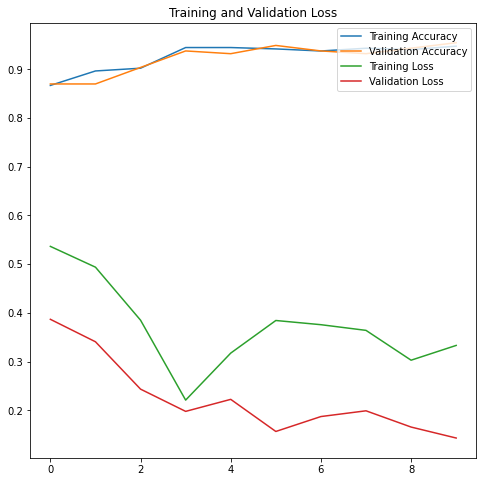

In [ ]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs_range = range(epochs) 
plt.figure(figsize=(8, 8)) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy') 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 
plt.title('Training and Validation Loss') 
plt.savefig("water_quality_nn.pdf", dpi=100) 
plt.show() 

4 layers On Architecture 2

In [ ]:
model = Sequential()
model.add(Dense(units=1000, activation='sigmoid', input_shape=(4,)))
model.add(Dropout(0.2))
model.add(Dense(units=100, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy',
 optimizer='adam',
 metrics=['accuracy'])

In [ ]:
epochs = 10
history = model.fit(x_train, y_train,batch_size=16,epochs = 10,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
42/42 [==============================] - 1s 8ms/step - loss: 0.3330 - accuracy: 0.8822 - val_loss: 0.1994 - val_accuracy: 0.9277
Epoch 2/10
42/42 [==============================] - 0s 5ms/step - loss: 0.2003 - accuracy: 0.9290 - val_loss: 0.1624 - val_accuracy: 0.9518
Epoch 3/10
42/42 [==============================] - 0s 4ms/step - loss: 0.1827 - accuracy: 0.9471 - val_loss: 0.1537 - val_accuracy: 0.9639
Epoch 4/10
42/42 [==============================] - 0s 4ms/step - loss: 0.1642 - accuracy: 0.9471 - val_loss: 0.1566 - val_accuracy: 0.9458
Epoch 5/10
42/42 [==============================] - 0s 5ms/step - loss: 0.1800 - accuracy: 0.9502 - val_loss: 0.1565 - val_accuracy: 0.9518
Epoch 6/10
42/42 [==============================] - 0s 5ms/step - loss: 0.1595 - accuracy: 0.9486 - val_loss: 0.1382 - val_accuracy: 0.9639
Epoch 7/10
42/42 [==============================] - 0s 5ms/step - loss: 0.1635 - accuracy: 0.9502 - val_loss: 0.1377 - val_accuracy: 0.9639
Epoch 8/10
42/42 [==

# 6TH LAYER ON ARCHITECTURE 2

In [ ]:
model = Sequential()
model.add(Dense(units=1000, activation='sigmoid', input_shape=(4,)))
model.add(Dropout(0.2))
model.add(Dense(units=500, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(units=200, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='sigmoid'))
model.add(Dropout(0.1))

In [ ]:
model.compile(loss='binary_crossentropy',
 optimizer='adam',
 metrics=['accuracy'])

In [ ]:
epochs = 10
history = model.fit(x_train, y_train,batch_size=16,epochs = 10,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
42/42 [==============================] - 1s 10ms/step - loss: 0.4812 - accuracy: 0.7855 - val_loss: 0.3454 - val_accuracy: 0.8916
Epoch 2/10
42/42 [==============================] - 0s 6ms/step - loss: 0.3629 - accuracy: 0.8837 - val_loss: 0.3420 - val_accuracy: 0.8916
Epoch 3/10
42/42 [==============================] - 0s 6ms/step - loss: 0.3619 - accuracy: 0.8837 - val_loss: 0.3378 - val_accuracy: 0.8916
Epoch 4/10
42/42 [==============================] - 0s 6ms/step - loss: 0.3527 - accuracy: 0.8837 - val_loss: 0.3164 - val_accuracy: 0.8916
Epoch 5/10
42/42 [==============================] - 0s 6ms/step - loss: 0.3104 - accuracy: 0.8837 - val_loss: 0.2540 - val_accuracy: 0.8916
Epoch 6/10
42/42 [==============================] - 0s 6ms/step - loss: 0.2478 - accuracy: 0.9033 - val_loss: 0.2120 - val_accuracy: 0.9337
Epoch 7/10
42/42 [==============================] - 0s 6ms/step - loss: 0.1967 - accuracy: 0.9471 - val_loss: 0.2046 - val_accuracy: 0.9277
Epoch 8/10
42/42 [=

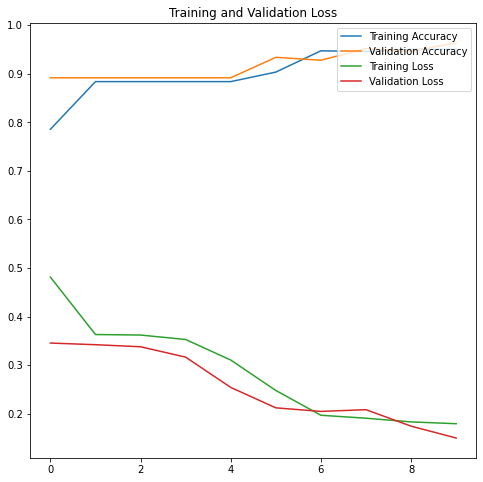

In [ ]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs_range = range(epochs) 
plt.figure(figsize=(8, 8)) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy') 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 
plt.title('Training and Validation Loss') 
plt.savefig("water_quality_nn.pdf", dpi=100) 
plt.show() 

Adding 4th layers on Architecture 3

In [ ]:
model = Sequential()
model.add(Dense(units=1000, activation='tanh', input_shape=(4,)))
model.add(Dropout(0.2))
model.add(Dense(units=500, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.add(Dropout(0.1))


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [ ]:
epochs = 10
history = model.fit(x_train, y_train,batch_size=16,epochs = 10,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
45/45 [==============================] - 1s 15ms/step - loss: 1.2022 - accuracy: 0.8982 - val_loss: 1.6826 - val_accuracy: 0.8833
Epoch 2/10
45/45 [==============================] - 1s 11ms/step - loss: 0.8848 - accuracy: 0.9303 - val_loss: 0.5786 - val_accuracy: 0.9111
Epoch 3/10
45/45 [==============================] - 1s 12ms/step - loss: 0.6829 - accuracy: 0.9247 - val_loss: 0.7710 - val_accuracy: 0.9000
Epoch 4/10
45/45 [==============================] - 1s 12ms/step - loss: 0.6718 - accuracy: 0.9317 - val_loss: 0.7767 - val_accuracy: 0.9000
Epoch 5/10
45/45 [==============================] - 1s 11ms/step - loss: 0.5402 - accuracy: 0.9372 - val_loss: 0.8126 - val_accuracy: 0.9000
Epoch 6/10
45/45 [==============================] - 0s 11ms/step - loss: 0.6213 - accuracy: 0.9331 - val_loss: 0.7866 - val_accuracy: 0.9000
Epoch 7/10
45/45 [==============================] - 1s 12ms/step - loss: 0.6074 - accuracy: 0.9261 - val_loss: 0.7600 - val_accuracy: 0.9000
Epoch 8/10
45

Adding 5th layers to Architecture 3

In [ ]:
model = Sequential()
model.add(Dense(units=1000, activation='tanh', input_shape=(4,)))
model.add(Dropout(0.5))
model.add(Dense(units=500, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=200, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [ ]:
epochs = 10
history = model.fit(x_train, y_train,batch_size=16,epochs = 10,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
45/45 [==============================] - 1s 16ms/step - loss: 0.3148 - accuracy: 0.9135 - val_loss: 0.3037 - val_accuracy: 0.8889
Epoch 2/10
45/45 [==============================] - 1s 13ms/step - loss: 0.2084 - accuracy: 0.9303 - val_loss: 0.2170 - val_accuracy: 0.9000
Epoch 3/10
45/45 [==============================] - 1s 13ms/step - loss: 0.1878 - accuracy: 0.9372 - val_loss: 0.2488 - val_accuracy: 0.9000
Epoch 4/10
45/45 [==============================] - 1s 13ms/step - loss: 0.1753 - accuracy: 0.9442 - val_loss: 0.2173 - val_accuracy: 0.9111
Epoch 5/10
45/45 [==============================] - 1s 13ms/step - loss: 0.2019 - accuracy: 0.9386 - val_loss: 0.2606 - val_accuracy: 0.9000
Epoch 6/10
45/45 [==============================] - 1s 12ms/step - loss: 0.1684 - accuracy: 0.9470 - val_loss: 0.2627 - val_accuracy: 0.9056
Epoch 7/10
45/45 [==============================] - 1s 12ms/step - loss: 0.1770 - accuracy: 0.9428 - val_loss: 0.2560 - val_accuracy: 0.9111
Epoch 8/10
45

6th Layer on architecture 3

In [ ]:
model = Sequential()
model.add(Dense(units=1000, activation='tanh', input_shape=(4,)))
model.add(Dropout(0.2))
model.add(Dense(units=200, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(100, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(units=50, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.80, random_state=42)

In [ ]:
epochs = 10
history = model.fit(x_train, y_train,batch_size=16,epochs = 10,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
11/11 [==============================] - 1s 36ms/step - loss: 0.5379 - accuracy: 0.8606 - val_loss: 0.3886 - val_accuracy: 0.8959
Epoch 2/10
11/11 [==============================] - 0s 12ms/step - loss: 0.3304 - accuracy: 0.9152 - val_loss: 0.2931 - val_accuracy: 0.8974
Epoch 3/10
11/11 [==============================] - 0s 12ms/step - loss: 0.2462 - accuracy: 0.9212 - val_loss: 0.2393 - val_accuracy: 0.8989
Epoch 4/10
11/11 [==============================] - 0s 12ms/step - loss: 0.1914 - accuracy: 0.9333 - val_loss: 0.2247 - val_accuracy: 0.9155
Epoch 5/10
11/11 [==============================] - 0s 13ms/step - loss: 0.1662 - accuracy: 0.9394 - val_loss: 0.2268 - val_accuracy: 0.9155
Epoch 6/10
11/11 [==============================] - 0s 14ms/step - loss: 0.1667 - accuracy: 0.9455 - val_loss: 0.2192 - val_accuracy: 0.9201
Epoch 7/10
11/11 [==============================] - 0s 13ms/step - loss: 0.1609 - accuracy: 0.9455 - val_loss: 0.2260 - val_accuracy: 0.9125
Epoch 8/10
11

DATA AUGMENTATION 


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y["thresholds_reached"] == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y["thresholds_reached"] == 0)))


Before OverSampling, counts of label '1': 95
Before OverSampling, counts of label '0': 733 



thresholds_reached
0    733
1     95
dtype: int64


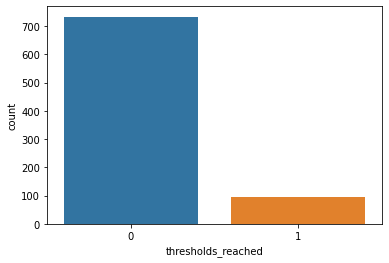

In [ ]:
print(df.groupby(['thresholds_reached']).size())
sns.countplot(x = 'thresholds_reached', data = df);

In [ ]:
from collections import Counter
from sklearn.svm import LinearSVC
from imblearn.pipeline import make_pipeline
from imblearn.base import BaseSampler
from imblearn.over_sampling import (SMOTE, RandomOverSampler)
#!pip install imbalanced-learn
import imblearn
from imblearn.over_sampling import SMOTE

In [ ]:
oversample = SMOTE()
X_train_res, y_train_res = oversample.fit_resample(x, y["thresholds_reached"].ravel())


In [ ]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (1466, 4)
After OverSampling, the shape of train_y: (1466,) 



In [ ]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, counts of label '1': 733
After OverSampling, counts of label '0': 733


In [ ]:
model = Sequential()
model.add(Dense(units=1000, activation='sigmoid', input_shape=(4,)))
model.add(Dropout(0.2))
model.add(Dense(units=200, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='sigmoid'))
model.add(Dropout(0.1))


In [ ]:
model.compile(loss='binary_crossentropy',
 optimizer='adam',
 metrics=['accuracy'])

In [ ]:
epochs = 10
history = model.fit(x_train, y_train,batch_size=16,epochs = 10,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
45/45 [==============================] - 1s 13ms/step - loss: 0.4700 - accuracy: 0.8954 - val_loss: 0.3518 - val_accuracy: 0.8722
Epoch 2/10
45/45 [==============================] - 0s 9ms/step - loss: 0.4056 - accuracy: 0.9177 - val_loss: 0.2571 - val_accuracy: 0.9111
Epoch 3/10
45/45 [==============================] - 0s 8ms/step - loss: 0.2778 - accuracy: 0.9456 - val_loss: 0.2011 - val_accuracy: 0.9389
Epoch 4/10
45/45 [==============================] - 0s 8ms/step - loss: 0.3217 - accuracy: 0.9470 - val_loss: 0.2726 - val_accuracy: 0.9222
Epoch 5/10
45/45 [==============================] - 0s 9ms/step - loss: 0.2343 - accuracy: 0.9484 - val_loss: 0.1617 - val_accuracy: 0.9556
Epoch 6/10
45/45 [==============================] - 0s 9ms/step - loss: 0.3269 - accuracy: 0.9498 - val_loss: 0.1441 - val_accuracy: 0.9556
Epoch 7/10
45/45 [==============================] - 0s 8ms/step - loss: 0.3567 - accuracy: 0.9484 - val_loss: 0.2314 - val_accuracy: 0.9167
Epoch 8/10
45/45 [=

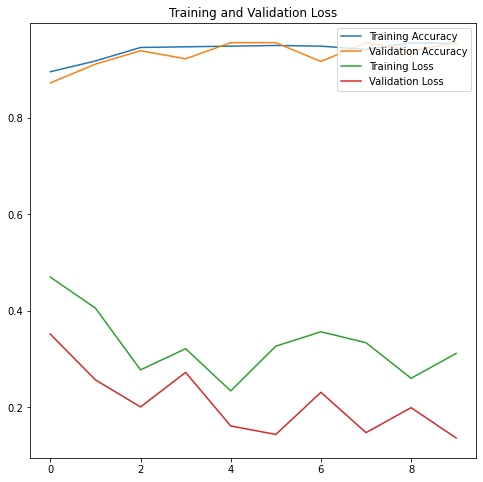

In [ ]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs_range = range(epochs) 
plt.figure(figsize=(8, 8)) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy') 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 
plt.title('Training and Validation Loss') 
plt.savefig("water_quality_nn.pdf", dpi=100) 
plt.show() 